<a href="https://colab.research.google.com/github/heinerkace/GoodStart/blob/main/PythonProjectPortfolioKace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Exploratory Data Analysis of Sales Data

We'll begin by importing the libraries we'll need.
Pandas and os

os will allow us to read all the data files listed in our chosen directory. This will come in handy when we combine the data files.

In [ ]:
import pandas as pd
import os

In [ ]:
#read in the first month of sales data to a dataframe
df = pd.read_csv('./sales_data/Sales_January_2019.csv')

Let's look at the data just to get a feel for what we're going to be combining.

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Next we'd like to combine all 12 data files into one dataframe.
First let's see what we have in the directory.
function We'll do this by osing the os listdir command.

In [ ]:
#read all files in the directory
files = [file for file in os.listdir('./sales_data')]

#Let's take a look at all the files in our directory.
for file in files:
  print(file)

Sales_May_2019.csv
Sales_October_2019.csv
Sales_August_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_November_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv


We have 12 months of sales data.
Using a for loop, we'll concatenate all the files into one using the pandas **concat** function.  

In [ ]:
#create a new dataframe named all_months_data
#all_months_data will hold our concatenated dataframes
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('./sales_data/' + file)
  all_months_data = pd.concat([all_months_data, df])


###Now you can see, we've combined all our data files into one dataframe. Sweet!

In [ ]:
all_data = all_months_data

Let's clean our dataset before we start doing any analyis.

Let's do some simple commands to look for null values or duplicates. We also want to see if we need to change any of the datatypes.

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


If we look at this output, there are some pretty clear issues.
All of the datatypes for each of the columns are objects (strings)

There are a few of these columns we'd like to change datatypes datatypes:
  1. Order ID -> int32
  2. Quanity Ordered -> int32
  3. Price Each -> float
  4. Order Date -> datetime
  5. Month -> int32



Let's first convert the  Order ID and Quantity ordered to integer dtypes

Next let's convert Price each to a float dtype

Last we'll conver Order Date to a datetime dtype

In [ ]:
#use the to_number pandas method to convert the column values to int32 dtype.
#set errors = 'coerce' so that any values not able to be converted to int32 will be set to nan
all_data['Order ID'] = pd.to_numeric(all_data['Order ID'], errors='coerce').astype(pd.Int32Dtype())
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce').astype(pd.Int32Dtype())

#using the same method we can convert the Price Each column to a numeric but then set its type to a float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce').astype(float)



Conver the Order Date Columns to datetime dtype

In [ ]:
#For the date time, we'll need to specify the format out data is in. This would be '%m/%d/%y %H:%M'
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M')


ValueError: time data "Order Date" doesn't match format "%m/%d/%y %H:%M", at position 964. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

It would seem we have an error with some of the rows when converting to datetime. This means some of the rows might have some values that aren't in our specified data format. We've been given row 211 as the first row with issues. Let's take a look at row 211.

In [ ]:
#Locating row 211
row_211 = all_data.iloc[211]

#print the columns of row 211
print(row_211 )

Order ID                                      194293
Product                       34in Ultrawide Monitor
Quantity Ordered                                   1
Price Each                                    379.99
Order Date                            05/16/19 19:09
Purchase Address    910 Madison St, Boston, MA 02215
Name: 211, dtype: object


Like we suspected, this row doesn't seem to have any valuable information and some nans. Specifically our Order Date has the value 'Order Date.'

Let's check to see if there are any similar rows in the dataframe.

In [ ]:
all_data.isna().sum()

Order ID            900
Product             545
Quantity Ordered    900
Price Each          900
Order Date          545
Purchase Address    545
dtype: int64

We have more rows similar to row 211. Let's get rid of all of them.

In [ ]:
#use the dropna() method to get rid of all rows with nan values
all_data = all_data.dropna()

Let's try this again

In [ ]:
#For the date time, we'll need to specify the format out data is in. This would be '%m/%d/%y %H:%M'
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M')


<ipython-input-13-1b10dca5cac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M')


Let's list all our dtypes in the dataframe:

In [ ]:
all_data.dtypes

Order ID                     Int32
Product                     object
Quantity Ordered             Int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Quickly check for null values

In [ ]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**Great! We've cleaned up the dataset a bit!**

### Augment Data with additional Columns
I'd like to add a column specific to month that lists the month in a string format like 'January.'

Let's create a Dictionary to map the numbers to the month names.

In [ ]:
# Dictionary to map month numbers to month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}


#Create a new column 'Month' and set it's values to the corresponding month map using the dt.month.map method
all_data['Month'] = all_data['Order Date'].dt.month.map(month_map)




<ipython-input-16-82099d610656>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].dt.month.map(month_map)


In [18]:
all_data.describe()

,Order ID,Quantity Ordered,Price Each,Order Date
count,185950.0,185950.0,185950.000000,185950
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464
min,141234.0,1.0,2.990000,2019-01-01 03:07:00
25%,185831.25,1.0,11.950000,2019-04-16 21:05:15
50%,230367.5,1.0,14.950000,2019-07-17 20:40:30
75%,275035.75,1.0,150.000000,2019-10-26 08:14:00
max,319670.0,9.0,1700.000000,2020-01-01 05:13:00
std,51512.73711,0.442793,332.731330,NaN


In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Month
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",May,5
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",May,5
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",May,5
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",May,5
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",May,5


In [27]:
unique_count = all_data.nunique()

In [31]:
print(f"There are {unique_count['Product']} unique products being ordered.")

There are 19 unique products being ordered.


Let's take a look at the monthly sales



In [43]:
monthly_sales = all_data.groupby('Month')['Quantity Ordered'].sum()
monthly_sales

Month
April        20558
August       13448
December     28114
February     13449
January      10903
July         16072
June         15253
March        17005
May          18667
November     19798
October      22703
September    13109
Name: Quantity Ordered, dtype: Int32

This output might look better if the months were numbered and sorted from January to December chronologically

Let's create a new column that just holds each month as a number

In [44]:
all_data['Order Month'] = all_data['Order Date'].dt.month

<ipython-input-44-35ee21f8db2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Month'] = all_data['Order Date'].dt.month


In [48]:
monthly_sales = all_data.groupby('Order Month')['Quantity Ordered'].sum()
print(monthly_sales)

Order Month
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
11    19798
12    28114
Name: Quantity Ordered, dtype: Int32


####Create a visual of the monthly sales data

Using the matplotlib library, we'll create a visualization to better visualize this output.


In [45]:
import matplotlib.pyplot as plt

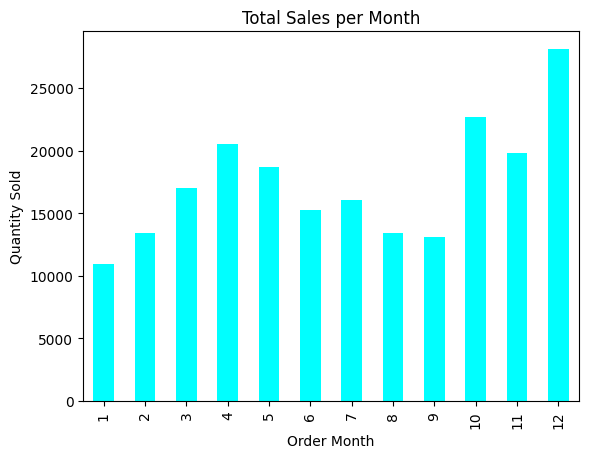

In [49]:
monthly_sales.plot(kind="bar", color="aqua")
plt.title('Total Sales per Month')
plt.xlabel("Order Month")
plt.ylabel("Quantity Sold")
plt.show()

##**This visualization is very helpful.**

* We can see that October, December, and April have the highest amounts of Products being ordered.
* We might be able to hypothesize that December is highest because of all the holiday shopping. It's possible some of this shopping takes place early in October as consumers get ready for the Holiday season.
* Quantity in April might be explained by spring shopping or home improvements. This is also the time most consumers receive their tax refund; giving them more disposable income for purchasing.



